# Importar bibliotecas

Instalación de Bibliotecas

In [5]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
#from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

## Carga de dataset

In [6]:
cur_dir = os.getcwd() 
df = pd.read_csv(cur_dir + '\\Datasets\\PT\\2023\\Niños LORETO.csv')

print('Tamaño del dataset:')
print('Registros: '+ str(df.shape[0]) + ', ' + 'Variables: ' + str(df.shape[1]))

Tamaño del dataset:
Registros: 80720, Variables: 43


## Limpieza de Dataset

La tabla contiene valores vacíos que poseen el caracter espacio (' '), estos valores se van a cambiar por el tipo de dato numpy NaN, equivalente a null. A continuación se muestran solo las variables con valores nulos.

In [7]:
df_copy = df.copy()

In [8]:
df_copy.replace(' ', np.nan, inplace=True)

##### Función para calcular la cantidad de campos nulos de un dataset y el porcentaje según el total de datos.
calcular_nulos(dataframe):
- La función recibe un dataframe del cual se desean conocer los campos y la cantidad de campos nulos que tenga el dataset.
- Retorna un dataframe con las columnas Conteo de Nulos y Porcentaje de Nulos


In [9]:
def calcular_nulos(df):
    df_temp = df.copy()
    nulos_sum = df_temp.isnull().sum()
    nulos_porc = (df_temp.isnull().sum()/len(df_temp))*100
    resumen_nulos = pd.DataFrame({'Conteo de Nulos': nulos_sum, 'Porcentaje de Nulos (%)': nulos_porc})
    return resumen_nulos[resumen_nulos['Conteo de Nulos'] > 0]


In [10]:
calcular_nulos(df_copy)

,Conteo de Nulos,Porcentaje de Nulos (%)
UbigeoPN,30612,37.923687
DepartamentoPN,30612,37.923687
ProvinciaPN,30612,37.923687
DistritoPN,30612,37.923687
CentroPobladoPN,30612,37.923687
Juntos,30612,37.923687
SIS,30612,37.923687
Pin,42548,52.710605
Qaliwarma,30612,37.923687
Alerta,80720,100.000000


### Eliminar variables que no son de interes

Se van a eliminar las variables que no aportan valor al estudio de la muestra

In [11]:
df_copy.columns

Index(['sw', 'Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS',
       'Dist_EESS', 'Renipress', 'FechaAtencion', 'Pais', 'Sexo',
       'FechaNacimiento', 'EdadMeses', 'UbigeoPN', 'DepartamentoPN',
       'ProvinciaPN', 'DistritoPN', 'CentroPobladoPN', 'Juntos', 'SIS', 'Pin',
       'Qaliwarma', 'Peso', 'Talla', 'PTZ', 'ZTE', 'ZPE', 'Alerta', 'Dx_PT',
       'Dx_TE', 'Dx_PE', 'Hemoglobina', 'FechaHemoglobina', 'Cred',
       'Suplementacion', 'Consejeria', 'Sesion', 'UbigeoREN',
       'DepartamentoREN', 'ProvinciaREN', 'DistritoREN', 'AlturaREN'],
      dtype='object')

In [12]:
drop_list = ['sw', 'Diresa', 'Red', 'Microred', 
             'EESS', 'Dpto_EESS', 'Prov_EESS', 'Dist_EESS', 
             'Renipress', 'FechaAtencion', 'Pais','FechaNacimiento', 
             'UbigeoPN', 'DepartamentoPN', 'ProvinciaPN', 'DistritoPN', 'CentroPobladoPN', 
             'Alerta',
             'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN', 'DistritoREN']
df_copy.drop(drop_list, axis=1, inplace=True)

## Análisis Estadístico Exploratorio

### Conviertiendo tipos de datos 

In [13]:
df_copy['FechaHemoglobina'] = pd.to_datetime(df_copy['FechaHemoglobina'])
df_copy['Hemoglobina'] = df_copy['Hemoglobina'].astype(float)
df_copy['Peso'] = df_copy['Peso'].astype(float)
df_copy['Talla'] = df_copy['Talla'].astype(float)
df_copy['PTZ'] = df_copy['PTZ'].astype(float)
df_copy['ZTE'] = df_copy['ZTE'].astype(float)
df_copy['ZPE'] = df_copy['ZPE'].astype(float)

### Funciones de soporte para la visualización de la distribución de variables

Función para realizar un gráfico de boxplot de una variable (Peso, Talla) según edad y sexo.

graf_distr_VES(df, var, edad, sexo, n_archivo):
- df: dataframe que se va a analizar
- var: nombre del campo de la variable de estudio (Peso o Talla) que está dentro de df
- edad: campo edad que está dentro de df
- sexo: campo sexo que está dentro de df
- n_archivo: nombre del archivo donde ser guardará la imagen

In [14]:
def graf_distr_VES(df, var, edad, sexo, n_archivo):
    df_temp = pd.DataFrame(df[var])
    df_temp[sexo] = df[sexo]
    df_temp[edad] = df[edad] / 12
    bins = [0, 1, 2, 3, 4, 5]
    labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
    df_temp['rango_edad'] = pd.cut(df_temp[edad], bins=bins, labels=labels, right=False)

    plt.figure(figsize=(12, 8))
    sns.boxplot(x='rango_edad', y = var, hue = sexo, data = df_temp, palette='muted')
    plt.title('Distribución de ' + var + ' por Rango de Edad y Sexo')
    plt.xlabel('Rango de Edad')
    plt.ylabel(var)
    plt.legend(title=sexo)
    plt.tight_layout()
    #plt.savefig(cur_dir+'/'+n_archivo+'.png')
    plt.show()
    del df_temp

Función para realizar una gráfica de mosaico con la distribución de frecuencias de una variable (Peso, Talla) según edad y sexo.

graf_distr_mosaico_VES(df, var, edad, sexo, n_archivo):
- df: dataframe que se va a analizar
- var: nombre del campo de la variable de estudio (Peso o Talla) que está dentro de df
- edad: campo edad que está dentro de df
- sexo: campo sexo que está dentro de df
- n_archivo: nombre del archivo donde ser guardará la imagen

In [15]:
def graf_distr_mosaico_VES(df, var, edad, sexo, n_archivo):
    df_temp = pd.DataFrame(df[var])
    df_temp[sexo] = df[sexo]
    df_temp[edad] = df[edad] / 12
    
    bins = [0, 1, 2, 3, 4, 5]
    labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
    df_temp['rango_edad'] = pd.cut(df_temp[edad], bins=bins, labels=labels, right=False)
    
    n_filas = len(labels)
    fig, axes = plt.subplots(nrows=n_filas, ncols=2, figsize=(12, 2 * n_filas)) # 2 columnas para Masculino y Femenino

    colores_kde = {'M': 'green', 'F': 'orange'}

    for i, rango in enumerate(labels):
        for j, genero in enumerate(['M', 'F']):
            subset = df_temp[(df_temp['rango_edad'] == rango) & (df_temp[sexo] == genero)]
            sns.histplot(subset[var], bins=15, ax=axes[i, j], kde=True, color=colores_kde[genero])
            axes[i, j].set_title(f'Edad: {rango}, Sexo: {genero}')
            axes[i, j].set_xlabel(var)
            axes[i, j].set_ylabel('Frecuencia')

    plt.tight_layout()
    #plt.savefig(cur_dir+'/'+n_archivo+'.png')
    plt.show()
    del df_temp

Función para eliminar outliers de un conjunto de datos

In [16]:
def eliminar_outliers(df, nombre_columna):
    Q1 = df[nombre_columna].quantile(0.25)
    Q3 = df[nombre_columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[nombre_columna] >= limite_inferior) & (df[nombre_columna] <= limite_superior)]
    data_filtrada = len(df)-len(df_filtrado)
    print('%i datos filtrados' %data_filtrada)
    return df_filtrado

### Segmentación del dataset


Los valores del dataset son segmentados entre niños y niñas de:
- 5 a 12 meses
- 1 a 2 años
- 2 a 3 años
- 3 a 4 años
- 4 a 5 años

In [17]:
condiciones = [
    ((df_copy['Sexo'] == 'M') & (df_copy['EdadMeses'] >=  6) & (df_copy['EdadMeses'] <= 12)),
    ((df_copy['Sexo'] == 'M') & (df_copy['EdadMeses'] > 12) & (df_copy['EdadMeses'] <= 24)),
    ((df_copy['Sexo'] == 'M') & (df_copy['EdadMeses'] > 24) & (df_copy['EdadMeses'] <= 36)),
    ((df_copy['Sexo'] == 'M') & (df_copy['EdadMeses'] > 36) & (df_copy['EdadMeses'] <= 48)),
    ((df_copy['Sexo'] == 'M') & (df_copy['EdadMeses'] > 48) & (df_copy['EdadMeses'] <= 60)),
    
    ((df_copy['Sexo'] == 'F') & (df_copy['EdadMeses'] >=  6) & (df_copy['EdadMeses'] <= 12)),
    ((df_copy['Sexo'] == 'F') & (df_copy['EdadMeses'] > 12) & (df_copy['EdadMeses'] <= 24)),
    ((df_copy['Sexo'] == 'F') & (df_copy['EdadMeses'] > 24) & (df_copy['EdadMeses'] <= 36)),
    ((df_copy['Sexo'] == 'F') & (df_copy['EdadMeses'] > 36) & (df_copy['EdadMeses'] <= 48)),
    ((df_copy['Sexo'] == 'F') & (df_copy['EdadMeses'] > 48) & (df_copy['EdadMeses'] <= 60)),
]

condicion_total = condiciones[0]
for cond in condiciones[1:]:
    condicion_total |= cond

In [18]:
df_copy = df_copy[condicion_total]

### Análisis de la variable Peso

Según la Organización Mundial de la Salud el peso típico de niños y niñas entre 0 y 5 años dentro del percentil 50 estan entre los siguientes rangos:
- Niños:
  - [03 - 12]: 6.5 - 9.5  Kg
  - [12 - 24]: 9.5 - 12.0 Kg
  - [24 - 36]:  12 - 14.5 Kg
  - [36 - 48]:  14 - 16.5 Kg
  - [48 - 60]:  16.5 - 18.5 Kg
  

- Niñas:
  - [3 - 12]:     6 - 9    Kg
  - [12 - 24]:    9 - 11.5 Kg
  - [24 - 36]:   11.5 - 14   Kg
  - [36 - 48]:   12 - 16 Kg
  - [48 - 60]:   12 - 18 Kg

In [19]:
df_copy = eliminar_outliers(df_copy, 'Peso')

305 datos filtrados


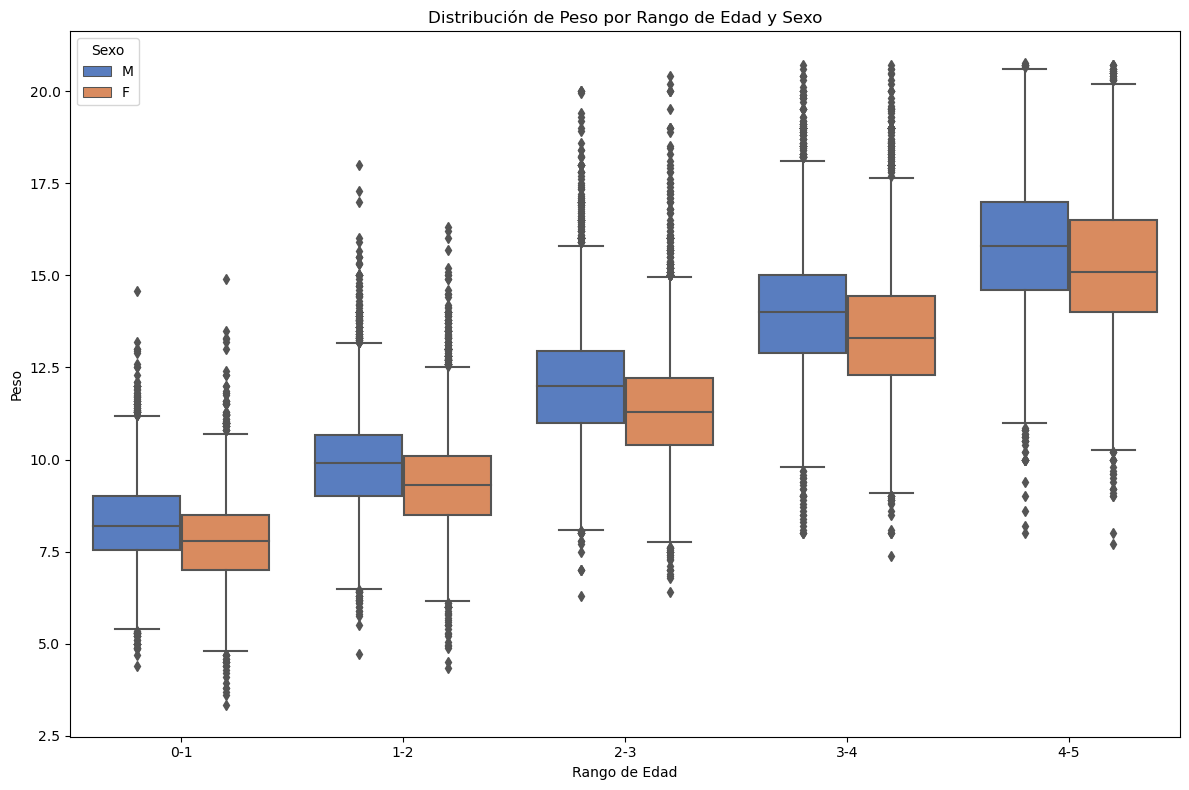

In [20]:
graf_distr_VES(df_copy, 'Peso', 'EdadMeses', 'Sexo', '01_graf')

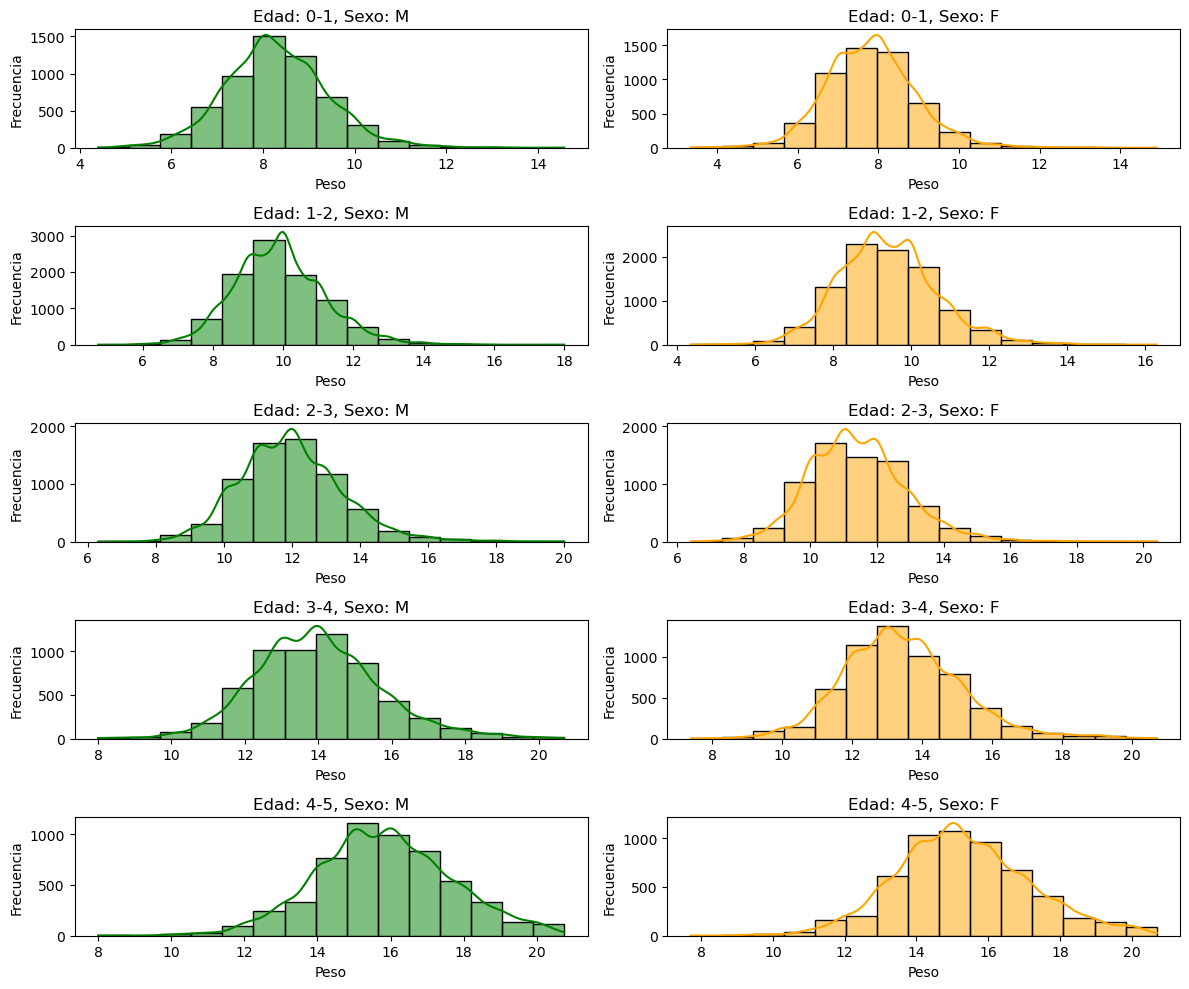

In [21]:
graf_distr_mosaico_VES(df_copy, 'Peso', 'EdadMeses', 'Sexo', '02_graf')

### Análisis de la variable Talla

Según la Organización Mundial de la Salud la estatura típica de niños y niñas entre 0 y 5 años dentro del percentil 50 estan entre los siguientes rangos:

- Niños: 50 a 110 cm
  - [3 - 12]: 61 - 76 cm
  - [12 - 24]: 76 - 87 cm
  - [24 - 36]: 85 - 96 cm
  - [36 - 48]:  96 - 103 cm
  - [48 - 60]:  103 - 110 cm

- Niñas: 49 a 110 cm
  - [3 - 12]: 60 - 74 cm
  - [12 - 24]: 74 - 86 cm
  - [24 - 36]: 86- 95 cm
  - [36 - 48]:  95 - 103 cm
  - [48 - 60]:  103 cm - 109 cm


Se elabora un boxplot de la columna Talla para determinar si hay valores atípicos, se omiten los valores nulos

In [22]:
df_copy = eliminar_outliers(df_copy, 'Talla')

0 datos filtrados


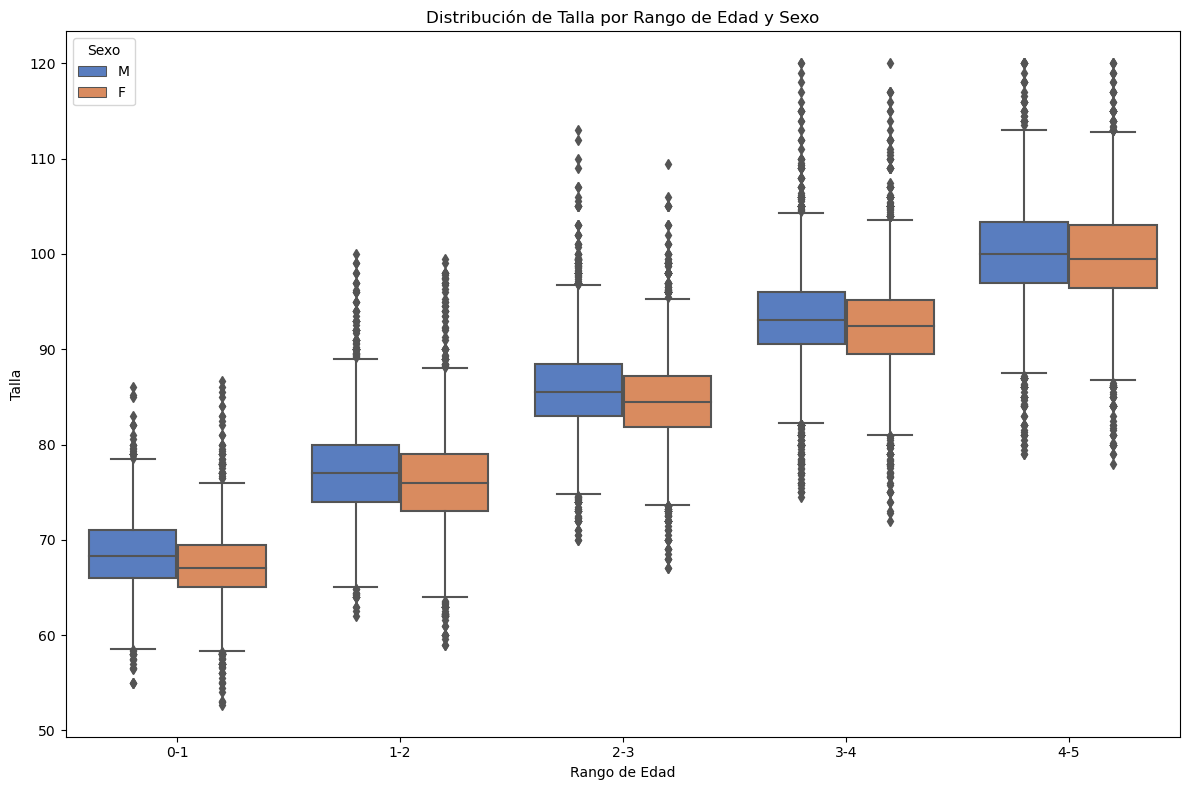

In [23]:
graf_distr_VES(df_copy, 'Talla', 'EdadMeses', 'Sexo', '03_graf')

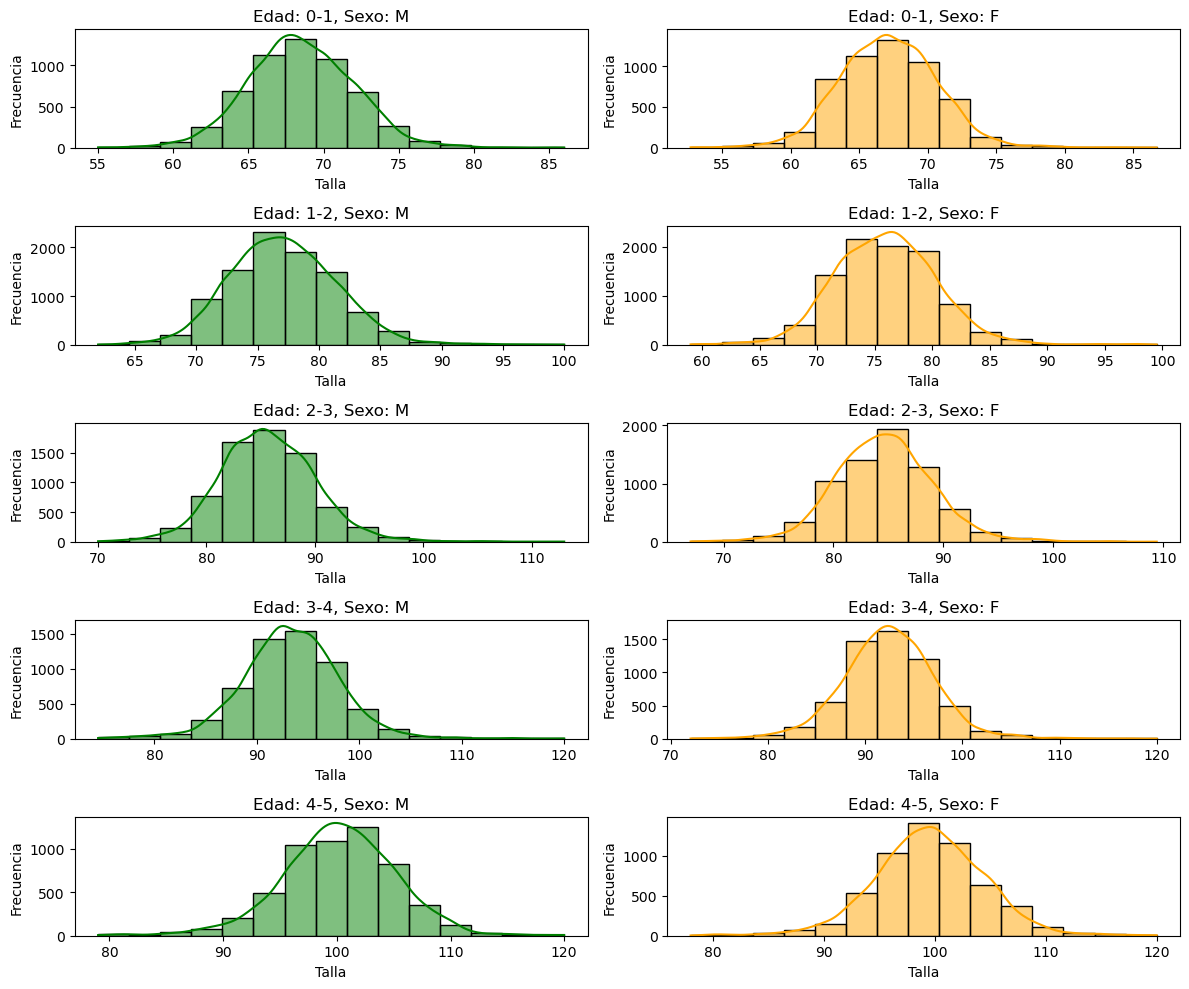

In [24]:
graf_distr_mosaico_VES(df_copy, 'Talla', 'EdadMeses', 'Sexo', '04_graf')

### Eliminar campos vacíos de la columna Hemoglobina

In [25]:
df_copy = df_copy.dropna(subset=['Hemoglobina'])

In [26]:
df_copy = df_copy.reset_index(drop = True)

### Funciones de apoyo para calculos relacionados a la hemoglobina

Función para cálculo de la hemoglobina corregida según la altura sobre el nivel del mar
calculo_hbc(hb, altura)
- hb: campo con los valores de hemoglobina
- altura: campo con la altura de la locaclidad donde se hizo la toma de la muestra de sangre del niño o niña

In [27]:
def calculo_hbc(hb, altura):
    if(altura >= 1000 and altura < 1100 ):
        hbc = hb-0.1
    elif (altura >= 1100 and altura < 1200):
        hbc = hb-0.2
    elif (altura >= 1200 and altura < 1300):
        hbc = hb-0.2
    elif (altura >= 1300 and altura < 1400):
        hbc = hb-0.3
    elif (altura >= 1400 and altura < 1500):
        hbc = hb-0.3
    elif (altura >= 1500 and altura < 1600):
        hbc = hb-0.4
    elif (altura >= 1600 and altura < 1700):
        hbc = hb-0.4
    elif (altura >= 1700 and altura < 1800):
        hbc = hb-0.5
    elif (altura >= 1800 and altura < 1900):
        hbc = hb-0.6
    elif (altura >= 1900 and altura < 2000):
        hbc = hb-0.7    
    elif (altura >= 2000 and altura < 2100):
        hbc = hb-0.7
    elif (altura >= 2100 and altura < 2200):
        hbc = hb-0.8
    elif (altura >= 2200 and altura < 2300):
        hbc = hb-0.9
    elif (altura >= 2300 and altura < 2400):
        hbc = hb-1.0
    elif (altura >= 2400 and altura < 2500):
        hbc = hb-1.1
    elif (altura >= 2500 and altura < 2600):
        hbc = hb-1.2
    elif (altura >= 2600 and altura < 2700):
        hbc = hb-1.3
    elif (altura >= 2700 and altura < 2800):
        hbc = hb-1.5
    elif (altura >= 2800 and altura < 2900):
        hbc = hb-1.6
    elif (altura >= 2900 and altura < 3000):
        hbc = hb-1.7
    elif (altura >= 3000 and altura < 3100):
        hbc = hb-1.8       
    elif (altura >= 3100 and altura < 3200):
        hbc = hb-2.0
    elif (altura >= 3200 and altura < 3300):
        hbc = hb-2.1
    elif (altura >= 3300 and altura < 3400):
        hbc = hb-2.3
    elif (altura >= 3400 and altura < 3500):
        hbc = hb-2.4
    elif (altura >= 3500 and altura < 3600):
        hbc = hb-2.6
    elif (altura >= 3600 and altura < 3700):
        hbc = hb-2.7
    elif (altura >= 3700 and altura < 3800):
        hbc = hb-2.9
    elif (altura >= 3800 and altura < 3900):
        hbc = hb-3.1
    elif (altura >= 3900 and altura < 4000):
        hbc = hb-3.2
    elif (altura >= 4000 and altura < 4100):
        hbc = hb-3.4
    elif (altura >= 4100 and altura < 4200):
        hbc = hb-3.6
    elif (altura >= 4200 and altura < 4300):
        hbc = hb-3.8
    elif (altura >= 4300 and altura < 4400):
        hbc = hb-4.0
    elif (altura >= 4400 and altura < 4500):
        hbc = hb-4.2
    elif (altura >= 4500 and altura < 4600):
        hbc = hb-4.4     
    elif (altura >= 4600 and altura < 4700):
        hbc = hb-4.6
    elif (altura >= 4700 and altura < 4800):
        hbc = hb-4.8
    elif (altura >= 4900 and altura < 5000):
        hbc = hb-5.2
    elif (altura >= 5000):
        hbc = hb-5.5
    else:
        hbc = hb
        
    return hbc

Función para diagnosticar la anemia basado en el valor de anemia, la clasificación sigue los lineamientos del Ministerio de Salud de Perú (MINSA)
- valor: valor de hemoglobina corregida según localidad

In [28]:
def clasificar_anemia(valor):
    if valor >= 11:
        return 'Normal'
    elif 10.0 <= valor < 11:
        return 'Anemia leve'
    elif 7.0 <= valor < 10.0:
        return 'Anemia moderada'
    else:  # valor < 7
        return 'Anemia grave'

### Calculando Hemoglobina corregida y diagnóstico de anemia

In [29]:
df_copy['HBC'] = df_copy.apply(lambda row: calculo_hbc(row['Hemoglobina'], row['AlturaREN']), axis=1)

In [30]:
df_copy['Dx_anemia'] = df_copy['HBC'].apply(clasificar_anemia)

### Eliminar valores vacíos de los programas Juntos, SIS, Pin, Qaliwarma

In [31]:
df_copy = df_copy.dropna(subset=['Juntos', 'SIS', 'Pin', 'Qaliwarma'])

In [32]:
df_copy = df_copy.reset_index(drop = True)

Se ha identificado que el tipo de dato de las siguientes variables no es el adecuado:
- [SIS, Pin, Qaliwarma, Juntos] -> int

In [33]:
df_copy['Juntos'] = df_copy['Juntos'].astype(int)
df_copy['SIS'] = df_copy['SIS'].astype(int)
df_copy['Pin'] = df_copy['Pin'].astype(int)
df_copy['Qaliwarma'] = df_copy['Qaliwarma'].astype(int)

### Otras gráficas descriptivas

#### Boxplot del IMC por Edad

Boxplot para conocer la distribución de los datos del IMC según edad y sexo

In [34]:
talla_mts = df_copy['Talla']*0.01
df_copy['IMC'] = df_copy['Peso']/(talla_mts**2)

In [35]:
df_copy = eliminar_outliers(df_copy, 'IMC')

234 datos filtrados


In [36]:
df_copy = df_copy.reset_index(drop = True)

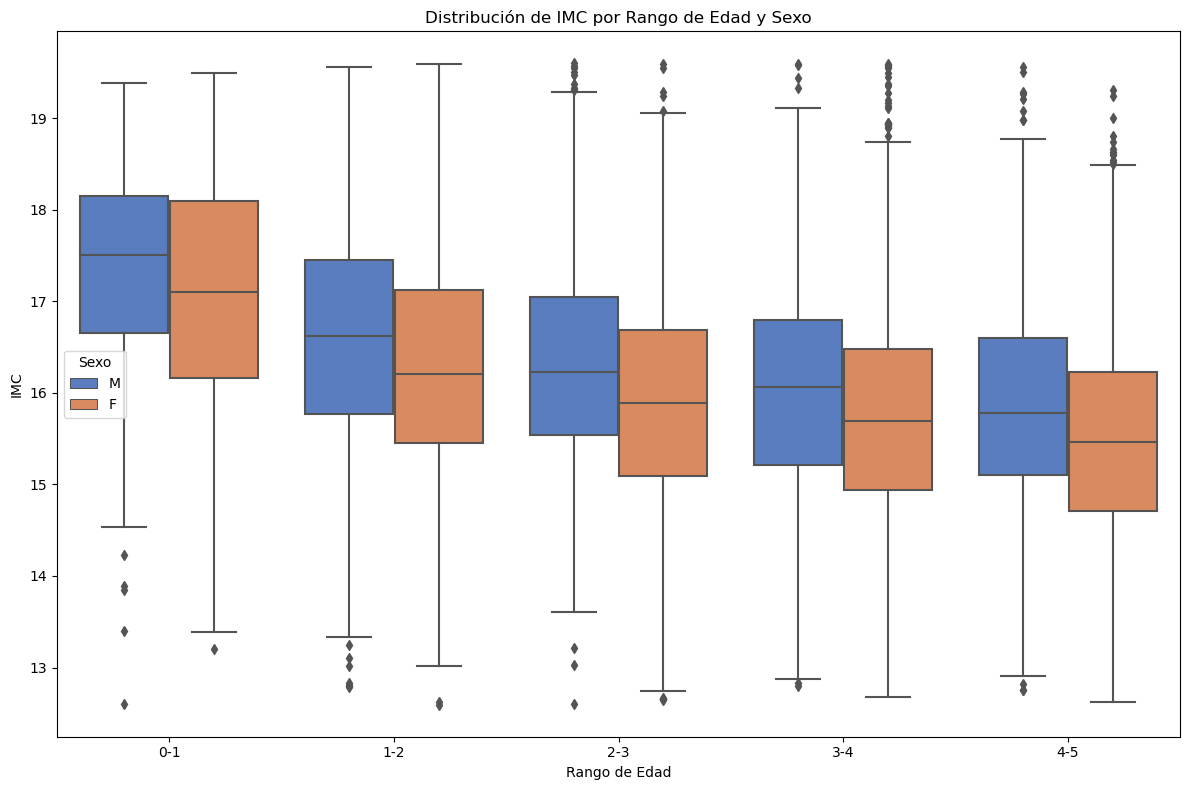

In [37]:
graf_distr_VES(df_copy, 'IMC', 'EdadMeses', 'Sexo', '05_graf')

#### Grafico de Correlación

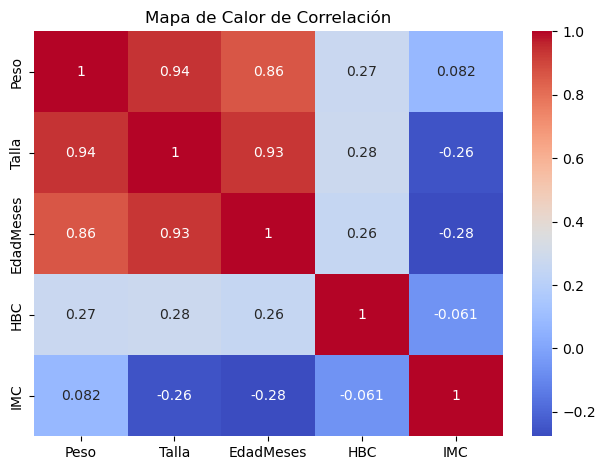

In [38]:
cols = ['Peso', 'Talla', 'EdadMeses', 'HBC', 'IMC']

df_corr = df_copy[cols]

matriz_correlacion = df_corr.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.tight_layout()
plt.show()


### Tablas de Contingencia para programas de Crecimiento y Desarrollo

In [39]:
variables_booleanas = ['Cred', 'Consejeria', 'Suplementacion'] 

for var_bool in variables_booleanas:
    tabla = pd.crosstab(df_copy[var_bool], df_copy['Dx_anemia'])
    print(f"Tabla de Contingencia para {var_bool} y var_categorica:")
    print(tabla)
    print("\n")

Tabla de Contingencia para Cred y var_categorica:
Dx_anemia  Anemia grave  Anemia leve  Anemia moderada  Normal
Cred                                                         
0                     2          429              193    1082
1                     5          984              364    6222


Tabla de Contingencia para Consejeria y var_categorica:
Dx_anemia   Anemia grave  Anemia leve  Anemia moderada  Normal
Consejeria                                                    
0                      7         1358              526    6994
1                      0           55               31     310


Tabla de Contingencia para Suplementacion y var_categorica:
Dx_anemia       Anemia grave  Anemia leve  Anemia moderada  Normal
Suplementacion                                                    
0                          2          322              133    3135
1                          5         1091              424    4169




### Gráfico de distribución de frecuencias de diagnóstico de anemia

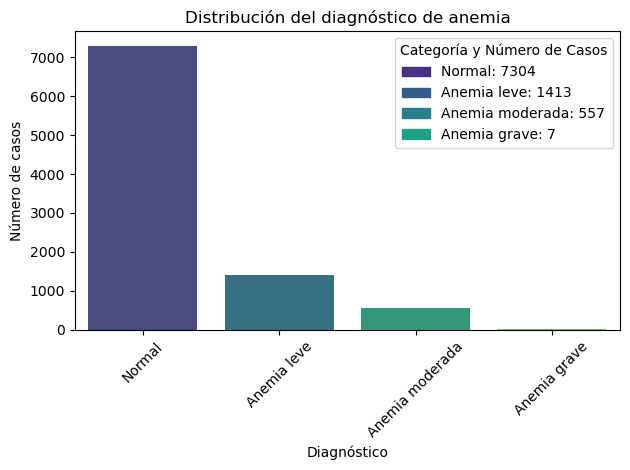

In [43]:
from matplotlib.patches import Patch
sns.countplot(x='Dx_anemia', data=df_copy, palette='viridis')

conteos = df_copy['Dx_anemia'].value_counts()
etiquetas_leyenda = [f'{categoria}: {conteo}' for categoria, conteo in conteos.items()]

plt.title(f'Distribución del diagnóstico de anemia')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de casos')
plt.xticks(rotation = 45)

parches_leyenda = [Patch(color=sns.color_palette('viridis')[i], label=label) for i, label in enumerate(etiquetas_leyenda)]
plt.legend(handles=parches_leyenda, title='Categoría y Número de Casos', loc='upper right', bbox_to_anchor=(1.0, 1))

plt.tight_layout()
plt.savefig(cur_dir+'/distr.png')
plt.show()


### Distribución de diagnóstico de anemia según el programa de salud

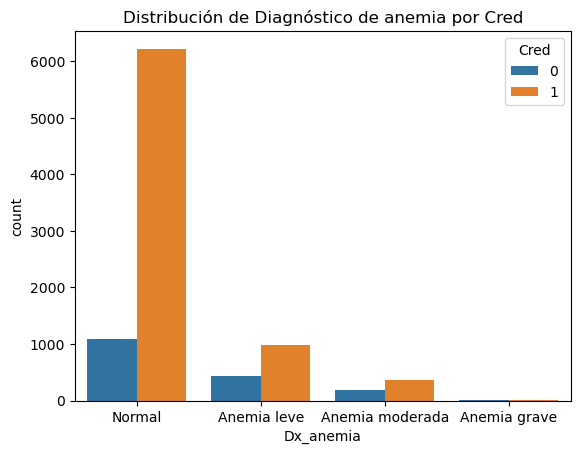

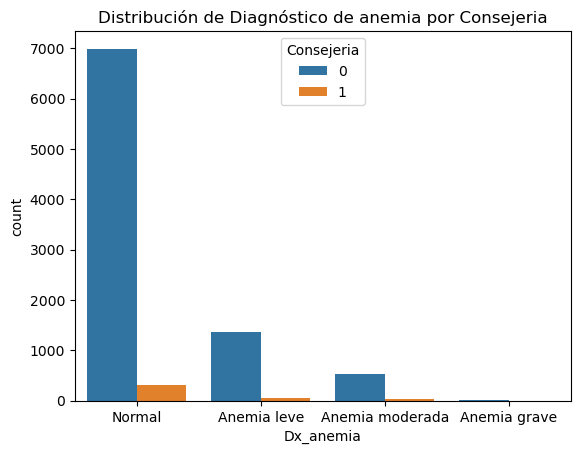

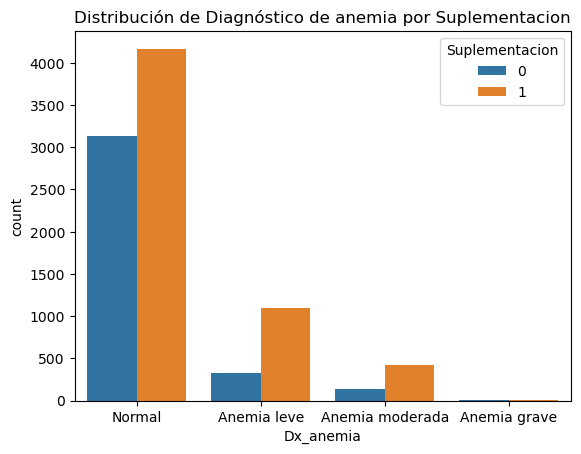

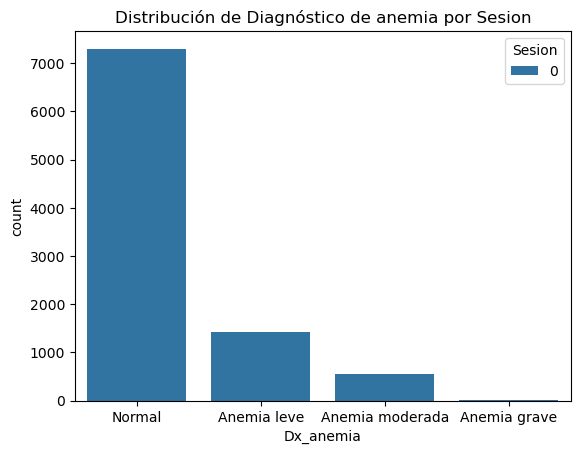

In [45]:
variables_booleanas = ['Cred', 'Consejeria', 'Suplementacion', 'Sesion'] 

for var_bool in variables_booleanas:
    sns.countplot(x='Dx_anemia', hue=var_bool, data=df_copy)
    plt.title(f'Distribución de Diagnóstico de anemia por {var_bool}')
    plt.show()

### Prueba de chi cuadrado para el diagnósticos de anemia según el programa de salud

In [52]:
from scipy.stats import chi2_contingency

In [53]:
variables_booleanas = ['Cred', 'Consejeria', 'Suplementacion', 'Sesion']
resultados_chi_cuadrado = []

for var in variables_booleanas:
    tabla_contingencia = pd.crosstab(df_copy[var], df_copy['Dx_anemia'])
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
    resultados_chi_cuadrado.append([var, chi2, p, dof])

In [54]:
columnas_resultados = ['Variable', 'Chi-Cuadrado', 'Valor p', 'Grados de Libertad']
df_resultados_chi_cuadrado = pd.DataFrame(resultados_chi_cuadrado, columns=columnas_resultados)

In [55]:
df_resultados_chi_cuadrado

,Variable,Chi-Cuadrado,Valor p,Grados de Libertad
0,Cred,295.869636,7.792478e-64,3
1,Consejeria,3.105919,3.755811e-01,3
2,Suplementacion,257.550914,1.522572e-55,3
3,Sesion,0.000000,1.000000e+00,0


## Modelado por Árbol de Precisión

#### Codificación de la variable categórica Dx_anamie:

- Anemia Normal   -> 0
- Anemia Leve     -> 1
- Anemia Moderada -> 2
- Anemia Grave    -> 3

In [56]:
codigos, categorias = pd.factorize(df_copy['Dx_anemia'])
df_copy['Dx_anemia_codificada'] = codigos

for categoria, codigo in zip(categorias, range(len(categorias))):
    print(f"{categoria} -> {codigo}")

Normal -> 0
Anemia leve -> 1
Anemia moderada -> 2
Anemia grave -> 3


In [58]:
from IPython.display import Image
%matplotlib inline

In [ ]:
#df_copy.to_csv(cur_dir + '\\Datasets\\PT\\2023\\Niños LORETO Procesado.csv', index=False)

In [59]:
df_copy = df_copy[df_copy['Dx_anemia_codificada'].isin([0,1,2])]

#### Entrenamiento del árbol de decisión

In [61]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df_copy[['Cred', 'Consejeria', 'Suplementacion', 'Peso', 'Talla']].to_numpy()
y = df_copy['Dx_anemia_codificada'].to_numpy()

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


- Método: CART
- Algoritmo: GINI
- Data de entrenamiento: 65%
- Data de prueba: 35%
- Profundidad: 4

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.35,
                                                    random_state = 1,
                                                    stratify = y)

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [65]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7837338262476895

In [68]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average='micro')

0.7837338262476895

In [69]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average = 'micro')

0.7837338262476895

#### Reporte de clasificación

In [76]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, predictions, target_names=['Normal', 'Anemia Leve', 'Anemia Moderada'], output_dict=True))

,Normal,Anemia Leve,Anemia Moderada,accuracy,macro avg,weighted avg
precision,0.788151,0.142857,0.125000,0.783734,0.352003,0.649909
recall,0.994131,0.004040,0.005128,0.783734,0.334433,0.783734
f1-score,0.879239,0.007859,0.009852,0.783734,0.298983,0.694130
support,2556.000000,495.000000,195.000000,0.783734,3246.000000,3246.000000


#### Matriz de Confusión

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

matriz_confusion = confusion_matrix(y_test, predictions)
print(matriz_confusion)


[[2541   11    4]
 [ 490    2    3]
 [ 193    1    1]]


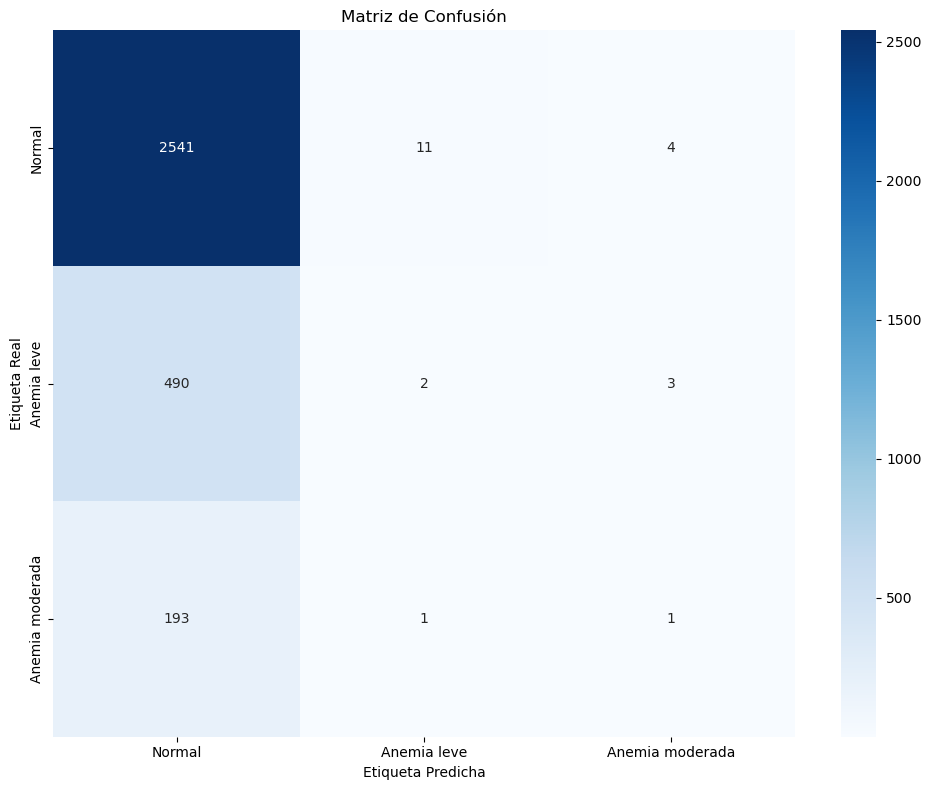

In [72]:
clases = ['Normal', 'Anemia leve', 'Anemia moderada']

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.savefig(cur_dir+'/mat_confusion.png')
plt.show()

#### Visualización de Árbol de Decisión

In [77]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, 
                           filled=True, 
                           rounded=True,
                           feature_names=['Cred', 'Consejeria', 'Suplementacion', 'Peso', 'Talla'],
                           class_names=['Normal', 'Anemia Leve', 'Anemia Moderada'], # Reemplaza con los nombres de tus clases
                           out_file=None)  
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree2.png')

True

El árbol se guarda en un archivo "Tree2.png"

In [78]:
from PIL import Image
from IPython.display import display

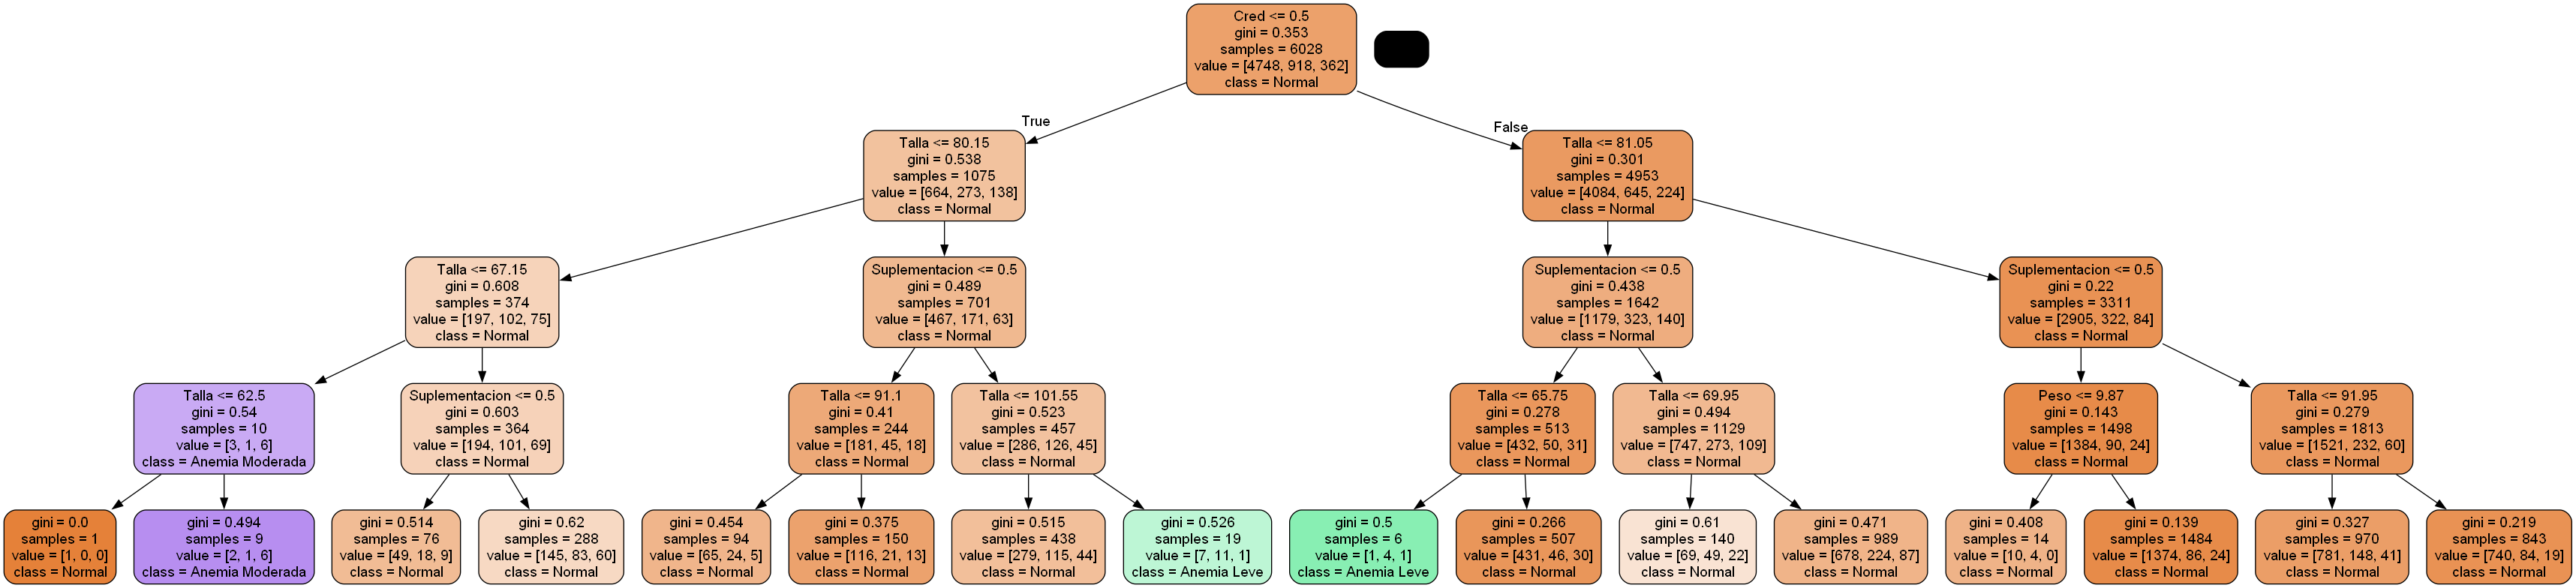

In [79]:
img = Image.open('tree2.png')
display(img)